## Facial Expression Detection Using RandomForest & Support Vector Machine (Comparison)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

Prepration For Data Acquisition from Drive

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from google.colab.patches import cv2_imshow

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/Facial expression Dataset/CKPLUS facialRec2.0.zip"

In [ ]:
print(os.listdir("/content/CKPLUS facialRec2.0"))

['train', 'test']


In [ ]:
#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/CKPLUS facialRec/train/*"):
    label = (os.path.split(directory_path)[-1])
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
       # print(img_path)
        img = cv2.imread(img_path,0) #Reading color images
        #img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        #print(np.shape(img),label)
        #cv2_imshow(img)
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        train_images.append(img)
        train_labels.append(label)
 
train_images = np.array(train_images)
train_labels = np.array(train_labels)

sadness
happy
surprise
contempt
fear
anger
disgust


In [ ]:
np.shape(train_images)


(636, 48, 48)

In [ ]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = [] 
#for directory_path in glob.glob("/content/Facial Expression dataset micro/test/*"):
for directory_path in glob.glob("/content/CKPLUS facialRec/test/*"):
  
    test_label = (os.path.split(directory_path)[-1])
    print(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 0)
        #img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional
        test_images.append(img)
        test_labels.append(test_label)
        #print(test_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

sadness
happy
surprise
contempt
fear
anger
disgust


In [ ]:
np.shape(test_images)

(84, 48, 48)

Pre-processing Labels

In [ ]:

#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
# Assigning to meaningful convention
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
np.shape(x_train)

(636, 48, 48)

In [ ]:
print(test_labels)

['sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'happy' 'happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy'
 'surprise' 'surprise' 'surprise' 'surprise' 'surprise' 'surprise'
 'surprise' 'surprise' 'surprise' 'surprise' 'surprise' 'surprise'
 'contempt' 'contempt' 'contempt' 'contempt' 'contempt' 'contempt'
 'contempt' 'contempt' 'contempt' 'contempt' 'contempt' 'contempt' 'fear'
 'fear' 'fear' 'fear' 'fear' 'fear' 'fear' 'fear' 'fear' 'fear' 'fear'
 'fear' 'anger' 'anger' 'anger' 'anger' 'anger' 'anger' 'anger' 'anger'
 'anger' 'anger' 'anger' 'anger' 'disgust' 'disgust' 'disgust' 'disgust'
 'disgust' 'disgust' 'disgust' 'disgust' 'disgust' 'disgust' 'disgust'
 'disgust']


Normalization

In [ ]:

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Pre-processing 

In [ ]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        input_img = x_train[image, :,:]
        img = input_img
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
        #df['Image_Name'] = image   #Capture image name as we read multiple images
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                #print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
           

        from skimage.filters import roberts, sobel, scharr, prewitt

    #Feature 3 is Roberts edge
        edge_roberts = roberts(img)
        edge_roberts1 = edge_roberts.reshape(-1)
        df['Roberts'] = edge_roberts1

    #Feature 4 is Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1

    #Feature 5 is Scharr
        edge_scharr = scharr(img)
        edge_scharr1 = edge_scharr.reshape(-1)
        df['Scharr'] = edge_scharr1

        #Feature 6 is Prewitt
        edge_prewitt = prewitt(img)
        edge_prewitt1 = edge_prewitt.reshape(-1)
        df['Prewitt'] = edge_prewitt1

        #Feature 7 is Gaussian with sigma=3
        from scipy import ndimage as nd
        gaussian_img = nd.gaussian_filter(img, sigma=3)
        gaussian_img1 = gaussian_img.reshape(-1)
        df['Gaussian s3'] = gaussian_img1

        #Feature 8 is Gaussian with sigma=7
        gaussian_img2 = nd.gaussian_filter(img, sigma=7)
        gaussian_img3 = gaussian_img2.reshape(-1)
        df['Gaussian s7'] = gaussian_img3

        #Feature 9 is Median with sigma=3
        median_img = nd.median_filter(img, size=3)
        median_img1 = median_img.reshape(-1)
        df['Median s3'] = median_img1


        # FEATURE 10 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1

       
        #Add more filters as needed
        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset
####################################################################

In [ ]:
#Extract features from training images
image_features = feature_extractor(x_train)

In [ ]:
#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=-1)
#image_features = image_features[0,:, :, 0]
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

In [ ]:
np.shape(X_for_RF)

(636, 27648)

# RF model

RF Model

In [ ]:
#n_estimators = 550, 
#random_state = 42,
#max_depth = 16
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(random_state = 42,n_estimators = 550)



In [ ]:
# Fit the model on training data
RF_model.fit(X_for_RF, y_train) 


RandomForestClassifier(n_estimators=550, random_state=42)

# SVM Model

SVM Model

In [ ]:
#Can also use SVM but RF is faster and may be more accurate.
from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification


SVC(decision_function_shape='ovo')

Train SVM Model

In [ ]:
SVM_model.fit(X_for_RF, y_train)

# Pre-processing Validation Data

In [ ]:
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)

In [ ]:
#Predict on Test data
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

In [ ]:
np.shape(x_test)

(35, 48, 48)

In [ ]:
print(test_for_RF.shape)

(84, 27648)


# RF Prediction

RF Predection

In [ ]:
#Predict on test
test_prediction = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

After Fine tuning

Accuracy =  0.6190476190476191


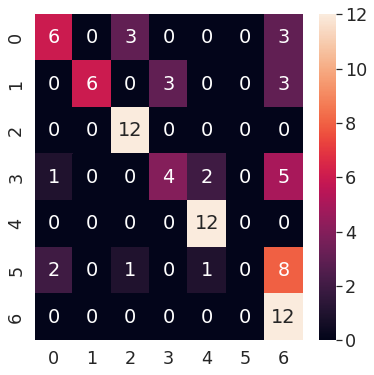

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

# SVM Prediction

In [ ]:
#Predict on test
test_prediction_svm = SVM_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_prediction_svm = le.inverse_transform(test_prediction_svm)

Accuracy on SVM Model

Accuracy =  0.4880952380952381


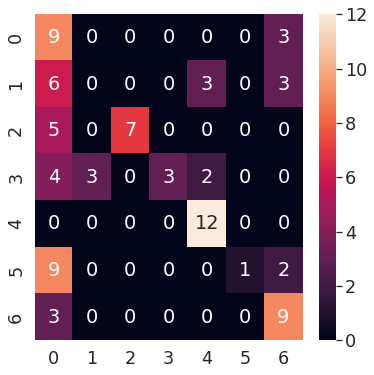

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction_svm))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction_svm)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

# Testing Both models With Random Images

RF Model Prediction

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The RF model prediction for this image is:  ['happy']
The actual label for this image is:  happy


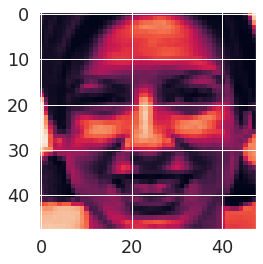

In [ ]:


#Check results on a few random images
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The RF model prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

SVM model Predection

The SVM model prediction for this image is:  ['happy']
The actual label for this image is:  happy


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


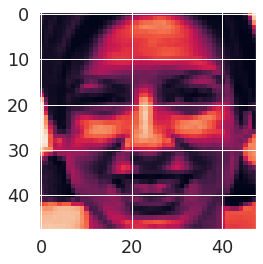

In [ ]:
#Predict
img_prediction = SVM_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The SVM model prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

plt.imshow(img)